### KNN을 이용한 농구선수 포지션 예측 

In [76]:
import pickle

In [77]:
# 데이터 불러오기 
with open('./Data/basketball_train.pkl', 'rb') as train_data :
    train = pickle.load(train_data)
with open('./Data/basketball_test.pkl', 'rb') as test_data : 
    test = pickle.load(test_data)

In [78]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 

In [79]:
train.shape

(80, 5)

## 최적의 K찾기 (교차 검증) 

In [80]:
max_k_range = train.shape[0] // 2 
k_list = []
for i in range(3, max_k_range, 2) : 
    k_list.append(i)

In [81]:
cross_validation_score = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

In [82]:
for k in k_list : 
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_score.append(scores.mean())

In [83]:
cross_validation_score 

[0.9125,
 0.925,
 0.9232142857142858,
 0.9089285714285713,
 0.9232142857142858,
 0.9232142857142858,
 0.9232142857142858,
 0.9232142857142858,
 0.8982142857142857,
 0.8607142857142858,
 0.8607142857142858,
 0.8607142857142858,
 0.8607142857142858,
 0.8607142857142858,
 0.8607142857142858,
 0.8357142857142857,
 0.8232142857142858,
 0.8232142857142858,
 0.8232142857142858]

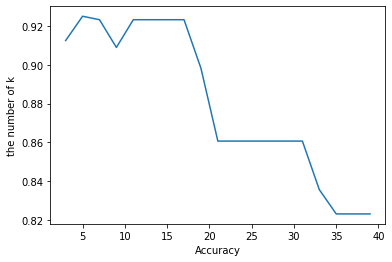

In [84]:
plt.plot(k_list, cross_validation_score)
plt.xlabel('Accuracy')
plt.ylabel('the number of k')
plt.show()

In [85]:
cvs = cross_validation_score
k = k_list[cvs.index(max(cross_validation_score))]
print("The best number of k :" + str(k))

The best number of k :5


### 2개의 특징으로 예측하기 (3점슛, 블로킹) 

In [86]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 

In [87]:
knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [88]:
comparison = pd.DataFrame({'prediction' : pred, 'ground_truth': y_test.values.ravel()})
comparison 

,prediction,ground_truth
0,C,C
1,C,C
2,SG,SG
3,C,C
4,SG,SG
5,SG,SG
6,C,C
7,C,C
8,SG,SG
9,SG,C


In [89]:
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.9


### 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드) 

In [90]:
knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [91]:
comparison = pd.DataFrame({'prediction' : pred, 'ground_truth': y_test.values.ravel()})
comparison.head()

,prediction,ground_truth
0,C,C
1,C,C
2,SG,SG
3,C,C
4,SG,SG


In [92]:
pred

array(['C', 'C', 'SG', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'SG', 'SG', 'SG',
       'C', 'C', 'C', 'SG', 'C', 'C', 'C', 'C'], dtype=object)

In [93]:
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.85
